In [1]:
import cv2

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train , y_train) , (X_test , y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

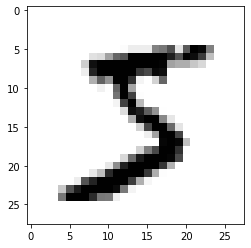

In [7]:
plt.imshow(X_train[0] , cmap= 'gray_r')

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
X_train[0].max()

255

In [13]:
X_train.shape

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
X_train = X_train.reshape(60000 , 28 , 28 , 1)
X_test = X_test.reshape(10000 , 28 , 28 , 1)

In [20]:
X_train = X_train/255

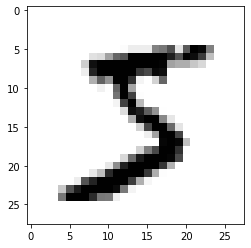

In [21]:
plt.imshow(X_train[0] , cmap = 'gray_r')

In [22]:
X_test = X_test/255

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train = to_categorical(y_train)

In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [27]:
y_test = to_categorical(y_test)

In [28]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [29]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
from tensorflow.keras.losses import categorical_crossentropy

In [42]:
model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size = (4,4) , input_shape = (28 , 28 , 1) , activation = 'relu'))

model.add(MaxPool2D(pool_size= (2,2)))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))

model.add(Dense(10 , activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [43]:
model.fit(X_train , y_train , epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1408 - accuracy: 0.9580
Epoch 2/2
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0494 - accuracy: 0.9853


In [44]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0504 - accuracy: 0.9833


[0.05043364688754082, 0.983299970626831]

In [45]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [46]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets